### 📦 Installing Statsmodels

The command **`pip install statsmodels`** installs the **Statsmodels** library in Python, which is a powerful tool for:

- **Statistical modeling** and **time series forecasting** (e.g., **ARIMA** models).
- Analyzing **historical data** to identify trends.
- Making predictions like future sales, supporting informed business decisions.

This is especially useful for projects like predicting sales in the food service industry.

---

In [ ]:
pip install statsmodels

---

### 🧹 Data Loading and Cleaning Process

This section explains how we prepare the sales and ingredients datasets for further analysis by loading, cleaning, and formatting the data.

---

#### 🔹 Step 1: Importing Required Libraries
We import necessary Python libraries:
- **`pandas`**: For data manipulation.
- **`matplotlib.pyplot`** and **`seaborn`**: For data visualization.

---

#### 🔹 Step 2: Loading Datasets
We load two datasets:
- **Pizza Ingredients Data**: Contains the ingredients required for different pizzas.
- **Pizza Sales Data**: Includes sales records.

---

#### 🔹 Step 3: Data Type Conversion & Error Handling
We ensure:
- **`order_date`** is converted to a valid **datetime** format.
- **`quantity`** is converted to a numeric format, handling any invalid values.

---

#### 🔹 Step 4: Checking for Missing Values
We check for any missing (null) values in both datasets to ensure data quality.

---

#### 🔹 Step 5: Handling Missing Data & Duplicates
- **Missing values** are removed from the sales data.
- **Duplicate rows** are removed from both datasets for cleaner data.

---

#### 🔹 Step 6: Final Data Quality Check
After cleaning, we review the structure of both datasets using **`info()`**, ensuring everything is clean and ready for analysis.

---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1
# Loading the given datasets

ingredients_df = pd.read_csv("/content/Pizza_ingredients.csv")
sales_df = pd.read_csv("/content/pizza_sales.csv")

#2
# Converting 'order_date' to datetime format
# Ensure 'quantity' is numeric type
#identifing the invalid values from both df

sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format='%m/%d/%Y', errors='coerce')
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')


#3
# Checking for missing values

print("\nMissing values in Sales data:")
print(sales_df.isnull().sum())

print("\nMissing values in Ingredients data:")
print(ingredients_df.isnull().sum())

#4
# Drop any rows with missing values in the sales data

sales_df.dropna(inplace=True)

#5
# Data Cleaning process : Removing duplicates

sales_df.drop_duplicates(inplace=True)
ingredients_df.drop_duplicates(inplace=True)

#6
# Checking the final cleaned datasets

print("\nCleaned Sales Data:")
print(sales_df.info())

print("\nCleaned Ingredients Data:")
print(ingredients_df.info())


Missing values in Sales data:
pizza_id                 0
order_id                 0
pizza_name_id           16
quantity                 0
order_date           29033
order_time               0
unit_price               0
total_price              7
pizza_size               0
pizza_category          23
pizza_ingredients       13
pizza_name               7
dtype: int64

Missing values in Ingredients data:
pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

Cleaned Sales Data:
<class 'pandas.core.frame.DataFrame'>
Index: 19521 entries, 0 to 46440
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           19521 non-null  int64         
 1   order_id           19521 non-null  int64         
 2   pizza_name_id      19521 non-null  object        
 3   quantity           19521 non-null  int64         
 4   order_date         19521 n

---

### 📊 Visualizing Sales Trend Over Time

In this section, we analyze and visualize the sales trend by grouping the data by **order date** and plotting it to observe how pizza sales vary over time.

---

#### 🔹 Step 1: Grouping Sales by Date
We group the **sales data** by the **`order_date`** and calculate the **total quantity of pizzas sold each day**.

- **`groupby('order_date')`**: Groups the sales data by each unique date.
- **`['quantity'].sum()`**: Sums up the total number of pizzas sold for each date.

---

#### 🔹 Step 2: Plotting the Daily Sales Trend
We create a **line plot** to visualize how pizza sales have changed over time.

- **`figsize=(10, 5)`**: Ensures a well-sized figure for the plot.
- **`plt.plot()`**: Plots the daily sales trend, where:
  - **`daily_sales.index`**: Represents the dates.
  - **`daily_sales.values`**: Represents the total number of pizzas sold on those dates.
  - **`color='blue'`**: Sets the line color.
  - **`marker='o'`**: Adds a circular marker at each data point.
  - **`linestyle='dashed'`**: Displays a dashed line between data points.

---

#### 🔹 Step 3: Adding Plot Titles and Labels
We enhance the plot by adding:
- **Title**: 'Daily Pizza Sales Over Time' to explain what the chart represents.
- **X-axis label**: 'Date' for clarity on the timeline.
- **Y-axis label**: 'Total Pizzas Sold' to show the quantity sold.
---

#### 🔹 Step 4: Improving Layout and Displaying the Plot
We use **`plt.tight_layout()`** to adjust spacing and prevent label overlap, and then we display the plot using **`plt.show()`**.

---

This plot helps us understand sales patterns and seasonal trends in pizza demand, which can be crucial for forecasting future sales and optimizing inventory levels.

---


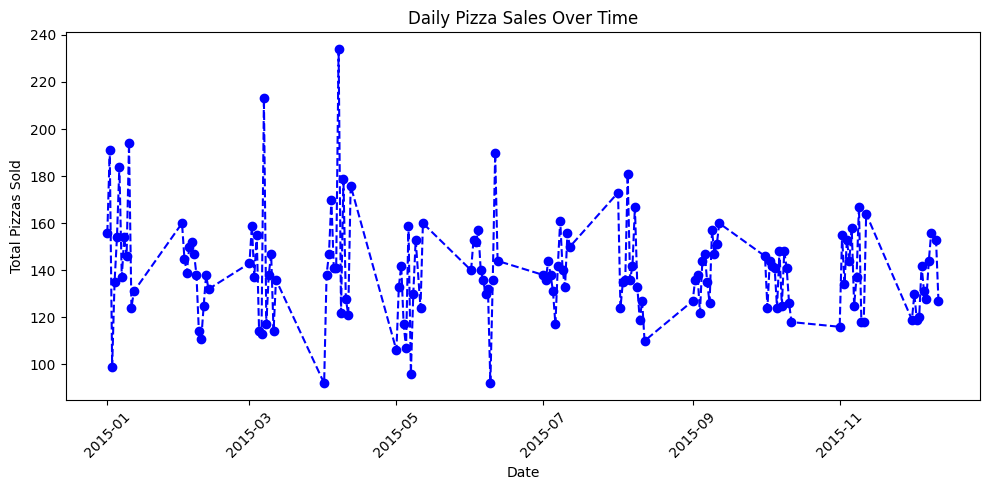

In [ ]:
# 1. Sales trend over time
#Grouping
daily_sales = sales_df.groupby('order_date')['quantity'].sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values, color='blue', marker='o', linestyle='dashed')
plt.title('Daily Pizza Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### 🍕 Analyzing Sales by Pizza Category

This section helps us understand the **sales distribution across different pizza categories** by visualizing the total number of pizzas sold in each category using a **bar plot**.

---

#### 🔹 Step 1: Grouping Sales by Pizza Category
We group the sales data by the **pizza category** and calculate the **total quantity of pizzas sold for each category**.


- **`groupby('pizza_category')`**: Groups the data by pizza categories (e.g., Veg, Non-Veg).
- **`['quantity'].sum()`**: Sums up the total number of pizzas sold for each category.

---

#### 🔹 Step 2: Creating the Bar Plot
We generate a **bar plot** to show how many pizzas were sold in each category, allowing for an easy comparison.


- **`figsize=(8, 5)`**: Sets the figure size to make the plot visually appealing and readable.
- **`sns.barplot()`**: Plots the data using a bar plot, where:
  - **`x=category_sales.index`**: Represents the pizza categories on the x-axis.
  - **`y=category_sales.values`**: Represents the total pizzas sold on the y-axis.
  - **`palette="muted"`**: Adds a muted color palette to make the bars distinct and aesthetically pleasing.

---

#### 🔹 Step 3: Adding Titles and Labels
We improve the plot by adding a title and labels for the x and y axes, making the chart easier to interpret.

- **Title**: Explains what the chart represents—'Total Pizza Sales by Category'.
- **X-axis Label**: 'Pizza Category' to clarify that the categories are shown on the x-axis.
- **Y-axis Label**: 'Total Pizzas Sold' to show the number of pizzas sold.

---

#### 🔹 Step 4: Adjusting the Layout and Displaying the Plot
We ensure that the layout is clean, preventing overlap, and display the final plot.

- **`plt.tight_layout()`**: Automatically adjusts the plot’s layout, ensuring that labels and elements are not overlapping.
- **`plt.show()`**: Displays the final bar plot.

---

This visualization is crucial for understanding which pizza categories are most popular, helping with inventory management and marketing strategies.

---

<ipython-input-5-93225a489f89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="muted")


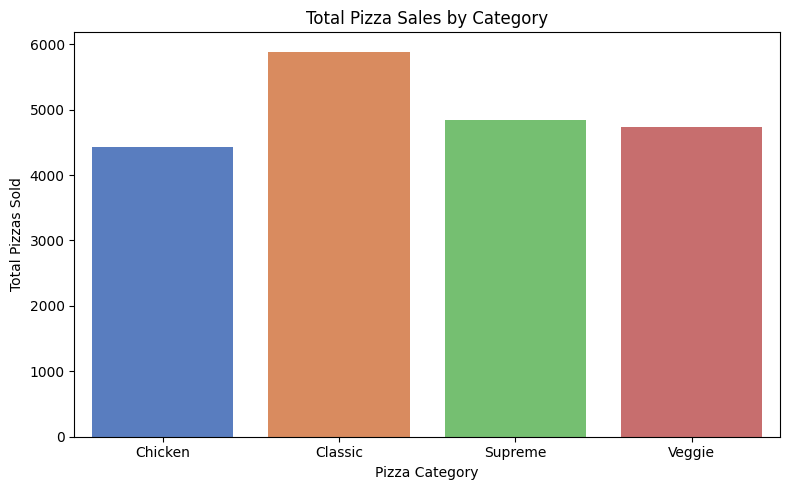

In [ ]:
# 2. Sales by pizza category
category_sales = sales_df.groupby('pizza_category')['quantity'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="muted")
plt.title('Total Pizza Sales by Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

---

### 🍕 Analyzing Sales by Pizza Size

In this section, we examine the **distribution of pizza sales by size** to understand consumer preferences for different pizza dimensions.

---

#### 🔹 Step 1: Grouping Sales by Pizza Size
We group the sales data by **pizza size** and calculate the **total quantity of pizzas sold for each size**.


- **`groupby('pizza_size')`**: Groups the data based on the sizes of the pizzas (e.g., Small, Medium, Large).
- **`['quantity'].sum()`**: Sums the total number of pizzas sold for each size category.

---

#### 🔹 Step 2: Creating the Bar Plot
We generate a **bar plot** to visualize the total number of pizzas sold in each size category, facilitating a straightforward comparison.


- **`figsize=(8, 5)`**: Sets the figure size for clarity and visual appeal.
- **`sns.barplot()`**: Creates the bar plot, where:
  - **`x=size_sales.index`**: Represents the pizza sizes on the x-axis.
  - **`y=size_sales.values`**: Represents the total number of pizzas sold on the y-axis.
  - **`palette="coolwarm"`**: Applies a color palette that transitions from cool to warm colors, enhancing visual distinction.

---

#### 🔹 Step 3: Adding Titles and Labels
We enhance the plot by including a title and labeling the axes, ensuring that the chart is easily understandable.

- **Title**: Clearly states what the chart represents—'Total Pizza Sales by Size'.
- **X-axis Label**: 'Pizza Size' indicates that the sizes are represented on the x-axis.
- **Y-axis Label**: 'Total Pizzas Sold' informs the viewer of the quantity of pizzas sold.

---

#### 🔹 Step 4: Adjusting the Layout and Displaying the Plot
We make sure the layout is tidy to prevent overlap, then display the plot.


- **`plt.tight_layout()`**: Automatically adjusts the plot’s layout to ensure all elements are clearly visible and not overlapping.
- **`plt.show()`**: Displays the final bar plot.

---

This visualization is essential for understanding consumer preferences regarding pizza sizes, which can guide inventory decisions and marketing strategies.

---


<ipython-input-6-f2d7c20d1daf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_sales.index, y=size_sales.values, palette="coolwarm")


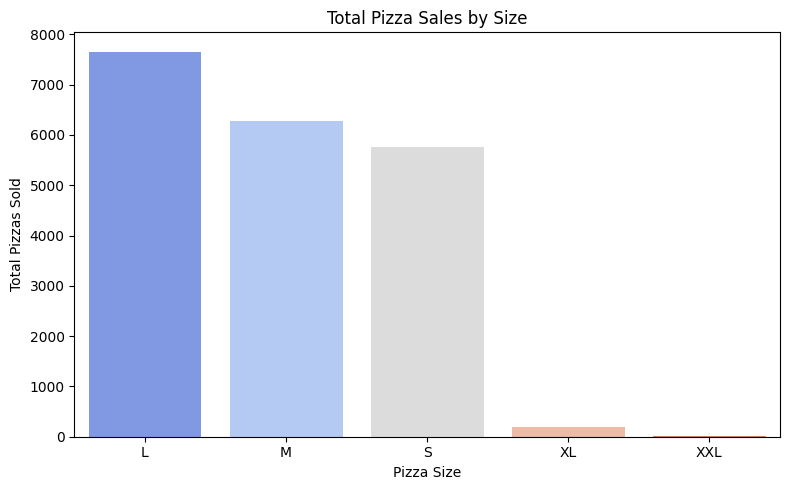

In [ ]:
# 3. Sales by pizza size
size_sales = sales_df.groupby('pizza_size')['quantity'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=size_sales.index, y=size_sales.values, palette="coolwarm")
plt.title('Total Pizza Sales by Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

---

### 📊 Analyzing Monthly Pizza Sales

In this section, we examine the **monthly sales trends** of pizzas to identify any **seasonal patterns** in consumer purchasing behavior.

---

#### 🔹 Step 1: Grouping Sales by Month
We group the sales data by month to calculate the **total quantity of pizzas sold each month**.


- **`sales_df['order_date'].dt.to_period('M')`**: Converts the order dates to a monthly period format, allowing us to group sales by month effectively.
- **`groupby(...)['quantity'].sum()`**: Groups the sales data based on the converted month and sums the total quantities of pizzas sold for each month.

---

#### 🔹 Step 2: Creating the Bar Plot
We generate a **bar plot** to visualize the total number of pizzas sold for each month.


- **`figsize=(10, 6)`**: Sets the figure size, making the plot larger and easier to read.
- **`monthly_sales.plot(kind='bar', color='skyblue')`**: Creates a bar plot to display the monthly sales data, with the bars colored in a light blue shade for clarity.

---

#### 🔹 Step 3: Adding Titles and Labels
We enhance the plot by including a title and labeling the axes to ensure the information is clear and understandable.

- **Title**: Clearly indicates what the chart represents—'Monthly Pizza Sales'.
- **X-axis Label**: 'Month' signifies that the x-axis displays the months of the year.
- **Y-axis Label**: 'Total Pizzas Sold' indicates the total number of pizzas sold during each month.

---

#### 🔹 Step 4: Adjusting the Layout and Displaying the Plot
We make sure the layout is tidy and free from overlap, then display the plot.

- **`plt.tight_layout()`**: Automatically adjusts the plot’s layout to ensure all elements are clearly visible without overlap.
- **`plt.show()`**: Displays the final bar plot, allowing viewers to see the monthly sales trends.

---

This analysis is crucial for understanding seasonal sales trends, enabling strategic decisions related to inventory management and marketing campaigns throughout the year.

---

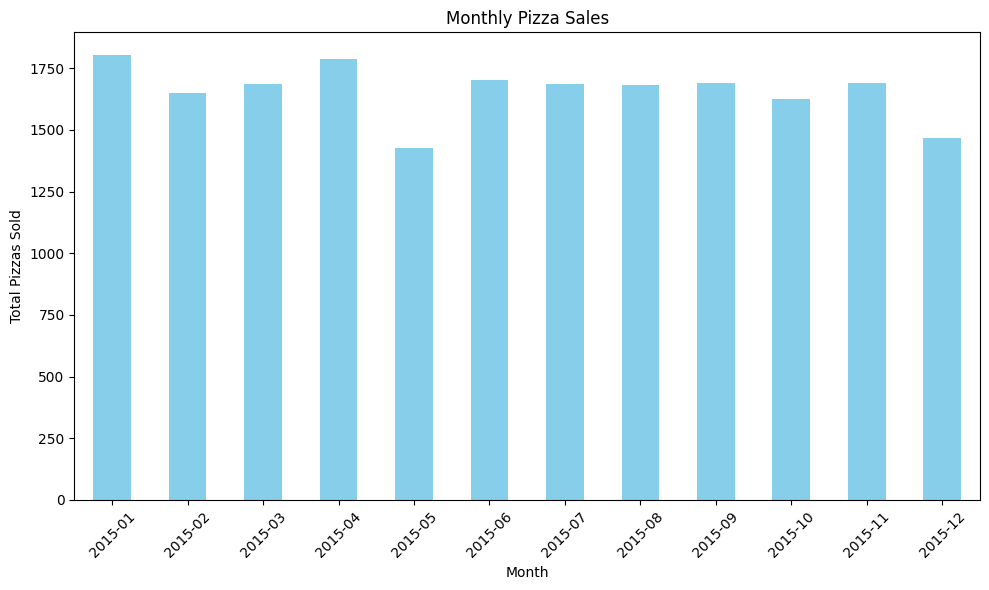

In [ ]:
# Group sales by month to analyze seasonal trends
monthly_sales = sales_df.groupby(sales_df['order_date'].dt.to_period('M'))['quantity'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Pizza Sales')
plt.xlabel('Month')
plt.ylabel('Total Pizzas Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### 📊 Creating Lag Features for Sales Data

In this section, we enhance the **sales dataset** by creating **lag features**, specifically **7-day** and **30-day rolling averages**, to analyze trends over different time periods.

---

#### 🔹 Step 1: Calculating 7-Day and 30-Day Rolling Averages
We compute rolling averages for the pizza sales quantities to smooth out short-term fluctuations and highlight longer-term trends.

- **`sales_df['quantity'].rolling(window=7).mean()`**: This calculates the **7-day rolling average** of the 'quantity' sold. For each day, it takes the average of the sales quantity over the last 7 days.
- **`sales_df['quantity'].rolling(window=30).mean()`**: Similarly, this calculates the **30-day rolling average**, providing a broader perspective by averaging the sales quantity over the last 30 days.

---

#### 🔹 Step 2: Displaying the Updated DataFrame
We print the first few rows of the updated DataFrame to view the newly created rolling averages alongside the original sales data.

- **`sales_df[['order_date', 'quantity', '7_day_avg', '30_day_avg']]`**: This selects specific columns from the DataFrame for display: the order date, quantity sold, 7-day average, and 30-day average.
- **`.head()`**: Displays the first five rows of the selected data, allowing us to quickly inspect the changes and see how the rolling averages align with the actual sales data.

---

### 🎯 Purpose of Lag Features
The inclusion of **lag features** like rolling averages helps in:

- **Identifying Trends**: Smoothing out daily fluctuations allows for better visibility of sales trends over time.
- **Forecasting**: Rolling averages are useful inputs for forecasting models, enhancing their accuracy by incorporating historical trends.
- **Seasonality Analysis**: They help in understanding seasonal patterns by revealing how sales volumes change over specified periods.

---

This process of creating lag features is crucial for building more robust predictive models and making informed business decisions based on historical sales performance.

---


In [ ]:
# Create lag features (7-day and 30-day rolling averages)
sales_df['7_day_avg'] = sales_df['quantity'].rolling(window=7).mean()
sales_df['30_day_avg'] = sales_df['quantity'].rolling(window=30).mean()

# Display the dataframe with rolling averages
print(sales_df[['order_date', 'quantity', '7_day_avg', '30_day_avg']].head())

  order_date  quantity  7_day_avg  30_day_avg
0 2015-01-01         1        NaN         NaN
1 2015-01-01         1        NaN         NaN
2 2015-01-01         1        NaN         NaN
3 2015-01-01         1        NaN         NaN
4 2015-01-01         1        NaN         NaN


---

### 📅 Analyzing Average Pizza Sales by Day of the Week

This section of the code helps to analyze pizza sales trends based on the **day of the week**. Understanding how sales vary throughout the week can aid in making informed business decisions, such as staffing and promotions.

---

#### 🔹 Step 1: Convert 'order_date' to Datetime Format
We start by ensuring that the **'order_date'** column is in the correct datetime format for analysis.

- **`pd.to_datetime()`**: This function converts the 'order_date' strings into datetime objects. The specified format indicates that the date is in **MM/DD/YYYY** format.
- **`errors='coerce'`**: This parameter ensures that any invalid date formats are replaced with `NaT` (Not a Time), preventing errors during conversion.

---

#### 🔹 Step 2: Create 'day_of_week' Column
Next, we create a new column to represent the day of the week for each order.

- **`.dt.dayofweek`**: This extracts the day of the week from the 'order_date', where **0 = Monday** and **6 = Sunday**. This numeric representation allows for easier grouping and analysis.

---

#### 🔹 Step 3: Group Sales by 'day_of_week'
We then group the sales data by the newly created 'day_of_week' column to calculate the average quantity sold for each day.

- **`sales_df.groupby('day_of_week')`**: This groups the DataFrame by the 'day_of_week' column.
- **`['quantity'].mean()`**: For each group (day), it calculates the average quantity of pizzas sold.

---

#### 🔹 Step 4: Plot the Average Sales by Day of the Week
Finally, we visualize the average sales for each day using a bar plot.

- **`plt.figure(figsize=(8, 5))`**: This sets the figure size for the plot.
- **`day_of_week_sales.plot(kind='bar', color='coral')`**: This creates a bar plot to represent the average sales, coloring the bars in **coral**.
- **`plt.title()`**, **`plt.xlabel()`**, and **`plt.ylabel()`**: These functions add a title and axis labels to the plot for clarity.
- **`plt.tight_layout()`**: This adjusts the layout to ensure that everything fits well without overlap.
- **`plt.show()`**: Displays the plot.

---

### 🎯 Purpose of Analyzing Sales by Day of the Week
This analysis provides valuable insights into:

- **Sales Patterns**: Identifying which days have higher or lower sales can inform staffing decisions and marketing strategies.
- **Resource Allocation**: Understanding peak days helps in managing inventory and staffing efficiently.
- **Promotional Strategies**: Adjusting promotions based on sales trends can enhance business performance.

---

By analyzing sales by day of the week, we can make data-driven decisions that support operational efficiency and customer satisfaction.

---

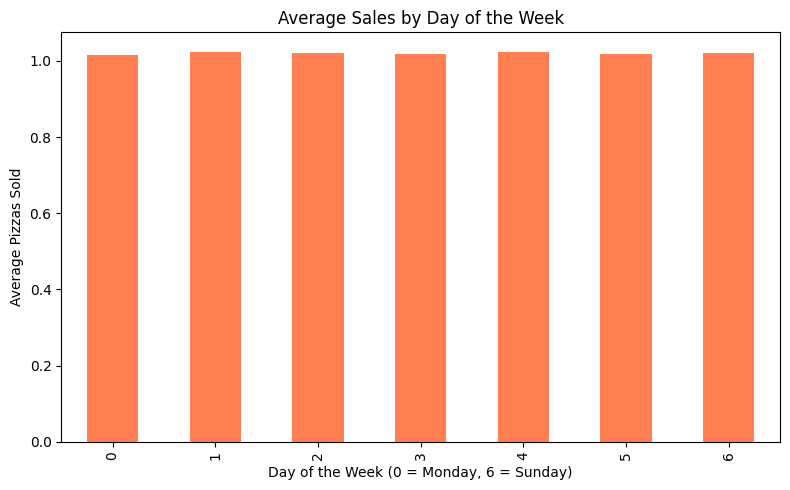

In [ ]:
# Step 1: Ensure 'order_date' is in datetime format
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format='%m/%d/%Y', errors='coerce')

# Step 2: Create 'day_of_week' column (0 = Monday, 6 = Sunday)
sales_df['day_of_week'] = sales_df['order_date'].dt.dayofweek

# Step 3: Group sales by 'day_of_week'
day_of_week_sales = sales_df.groupby('day_of_week')['quantity'].mean()

# Step 4: Plot the sales by day of the week
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
day_of_week_sales.plot(kind='bar', color='coral')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Pizzas Sold')
plt.tight_layout()
plt.show()

---

### 💰 Analyzing Total Pizza Sales by Price Range

This section of the code categorizes pizza sales based on their **unit price** and visualizes the total sales for each price range. Understanding sales distribution across price ranges can help in pricing strategy and inventory management.

---

#### 🔹 Step 1: Create Bins for Different Price Ranges
We begin by categorizing the **'unit_price'** of pizzas into specified ranges.


- **`pd.cut()`**: This function segments and sorts the values in the 'unit_price' column into discrete intervals (bins).
- **`bins=[0, 10, 15, 20, 30]`**: Specifies the edges of the bins. For example, prices from **0 to 10** are categorized as **'Low'**, **10 to 15** as **'Medium'**, **15 to 20** as **'High'**, and **20 to 30** as **'Premium'**.
- **`labels=['Low', 'Medium', 'High', 'Premium']`**: These labels are assigned to the corresponding bins for easy reference.

---

#### 🔹 Step 2: Group Sales by Price Range
Next, we group the sales data to calculate the total quantity sold for each price range.


- **`sales_df.groupby('price_range')`**: This groups the DataFrame by the 'price_range' column created in the previous step.
- **`['quantity'].sum()`**: For each price range, it calculates the total quantity of pizzas sold.

---

#### 🔹 Step 3: Plot Sales by Price Range
Finally, we visualize the total sales for each price range using a bar plot.


- **`plt.figure(figsize=(8, 5))`**: Sets the figure size for the plot.
- **`price_sales.plot(kind='bar', color='purple')`**: Creates a bar plot to represent total sales, coloring the bars in **purple**.
- **`plt.title()`**, **`plt.xlabel()`**, and **`plt.ylabel()`**: These functions add a title and axis labels to the plot for better understanding.
- **`plt.tight_layout()`**: Adjusts the layout to ensure everything fits neatly without overlap.
- **`plt.show()`**: Displays the plot.

---

### 🎯 Purpose of Analyzing Sales by Price Range
This analysis helps in:

- **Understanding Customer Preferences**: Identifying which price ranges are most popular can guide product offerings and pricing strategies.
- **Inventory Management**: Knowing sales distribution can inform restocking decisions for different price categories.
- **Targeted Marketing**: Promotions can be tailored based on the price range that sees higher sales, optimizing marketing efforts.

---

By categorizing and analyzing sales by price range, we gain insights that can enhance business strategies and improve customer satisfaction.

---


<ipython-input-10-537af8b3aac7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = sales_df.groupby('price_range')['quantity'].sum()


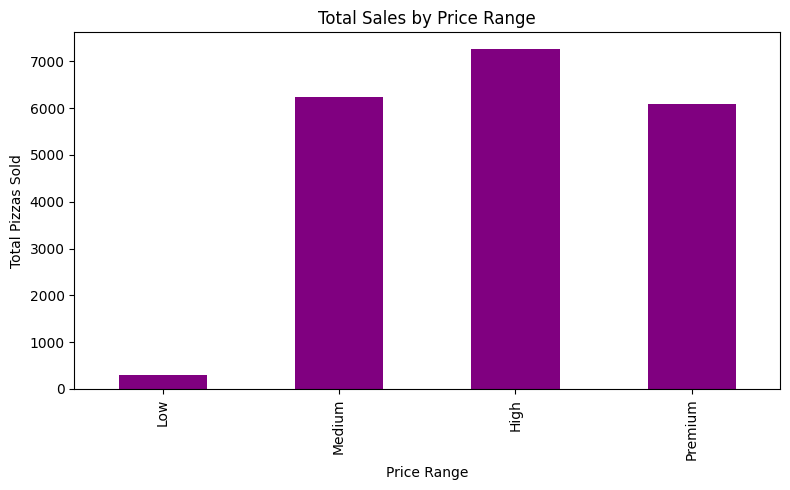

In [ ]:
# Create bins for different price ranges
sales_df['price_range'] = pd.cut(sales_df['unit_price'], bins=[0, 10, 15, 20, 30], labels=['Low', 'Medium', 'High', 'Premium'])

# Group sales by price range
price_sales = sales_df.groupby('price_range')['quantity'].sum()

# Plot sales by price range
plt.figure(figsize=(8, 5))
price_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

---

### 📅 Analyzing Total Pizza Sales by Weekdays and Weekends

This section of the code enhances the sales dataset by engineering features related to the day of the week and identifying weekend sales. Understanding sales patterns on weekdays versus weekends can provide insights for marketing and staffing decisions.

---

#### 🔹 Step 1: Feature Engineering for Day and Month
We begin by extracting features related to the order date.


- **`sales_df['day_of_week'] = sales_df['order_date'].dt.dayofweek`**: This line extracts the day of the week from the 'order_date' column. Days are represented as integers, where **0 = Monday** and **6 = Sunday**.
- **`sales_df['month'] = sales_df['order_date'].dt.month`**: This extracts the month from the 'order_date', represented as an integer from **1 (January) to 12 (December)**.

---

#### 🔹 Step 2: Adding a Weekend Feature
Next, we create a binary feature that indicates whether the sale occurred on a weekend.

- **`sales_df['is_weekend']`**: This creates a new column in the DataFrame.
- **`.apply(lambda x: 1 if x >= 5 else 0)`**: The `apply()` function applies a lambda function to each element in 'day_of_week'. If the day is Saturday (5) or Sunday (6), it assigns a value of **1** (indicating a weekend); otherwise, it assigns **0** (indicating a weekday).

---

#### 🔹 Step 3: Analyzing Sales Trends Over Weekdays and Weekends
We group the sales data by the weekend feature to analyze total sales.


- **`sales_df.groupby('is_weekend')`**: This groups the DataFrame by the 'is_weekend' column.
- **`['quantity'].sum()`**: For each group (weekday or weekend), it calculates the total quantity of pizzas sold.

---

#### 🔹 Step 4: Visualizing Weekend and Weekday Sales
Finally, we visualize the sales data using a bar plot.


- **`plt.figure(figsize=(6, 4))`**: Sets the figure size for the plot.
- **`sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette="pastel")`**: Creates a bar plot to represent total sales for weekdays (0) and weekends (1), using a pastel color palette.
- **`plt.title()`, `plt.xlabel()`, and `plt.ylabel()`**: These functions add a title and axis labels for clarity.
- **`plt.tight_layout()`**: Adjusts the layout to ensure everything fits neatly without overlap.
- **`plt.show()`**: Displays the plot.

---

### 🎯 Purpose of Analyzing Sales by Weekdays and Weekends
This analysis helps in:

- **Identifying Sales Patterns**: Understanding how sales differ between weekdays and weekends can inform staffing, marketing, and inventory decisions.
- **Optimizing Promotions**: Special promotions can be tailored for weekends to boost sales during peak times.
- **Resource Allocation**: Businesses can adjust inventory and staffing levels based on expected sales trends on different days.

---

By analyzing sales based on weekdays and weekends, we gain insights that can enhance operational strategies and improve customer satisfaction.

---


<ipython-input-11-c17d0649b929>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette="pastel")


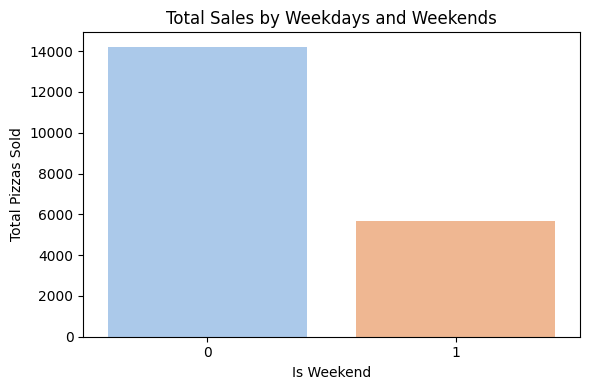

In [ ]:
# Feature Engineering: Adding day of the week, month, etc.
sales_df['day_of_week'] = sales_df['order_date'].dt.dayofweek
sales_df['month'] = sales_df['order_date'].dt.month

# Adding a weekend feature (0 = Weekday, 1 = Weekend)
sales_df['is_weekend'] = sales_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Analyzing sales trends over weekdays and weekends
weekend_sales = sales_df.groupby('is_weekend')['quantity'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette="pastel")
plt.title('Total Sales by Weekdays and Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Total Pizzas Sold')
plt.tight_layout()
plt.show()

---

### 📈 ARIMA Model for Pizza Sales Forecasting

This section of the code implements an ARIMA (AutoRegressive Integrated Moving Average) model to forecast pizza sales based on historical data. ARIMA is widely used for time series forecasting, helping to predict future values based on past observations.

---

#### 🔹 Step 1: Import Required Libraries
We begin by importing necessary libraries:


- **`ARIMA`**: This class from the Statsmodels library is used to create and fit the ARIMA model.
- **`mean_absolute_percentage_error`**: This function from Scikit-learn calculates the Mean Absolute Percentage Error (MAPE), a metric for evaluating forecast accuracy.

---

#### 🔹 Step 2: Aggregating Daily Sales Data
We aggregate the total daily sales to prepare for modeling:


- **`sales_df.groupby('order_date')['quantity'].sum()`**: This line groups the sales data by the 'order_date' and calculates the total quantity sold each day, resulting in a time series of daily sales.

---

#### 🔹 Step 3: Split Data into Train and Test Sets
Next, we split the aggregated sales data into training and testing sets:

- **`train_size = int(len(daily_sales) * 0.8)`**: This calculates the size of the training set, using **80%** of the data.
- **`train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]`**: This slices the `daily_sales` series into `train_data` (first 80%) and `test_data` (remaining 20%).

---

#### 🔹 Step 4: Fit the ARIMA Model
We now fit the ARIMA model to the training data:

- **`ARIMA(train_data, order=(5, 1, 0))`**: This creates an ARIMA model object with specified parameters:
  - **`p = 5`**: Number of lag observations included in the model (autoregressive part).
  - **`d = 1`**: Number of times that the raw observations are differenced (integrated part).
  - **`q = 0`**: Size of the moving average window (moving average part).
- **`arima_model = model.fit()`**: This fits the ARIMA model to the training data.

---

#### 🔹 Step 5: Predict Sales
After fitting the model, we make predictions:

- **`arima_model.forecast(steps=len(test_data))`**: This generates future sales predictions for the number of time steps equal to the length of the test dataset.

---

#### 🔹 Step 6: Evaluate the Model Using MAPE
We evaluate the accuracy of the model's predictions:

- **`mean_absolute_percentage_error(test_data, predictions)`**: This computes the MAPE, which measures the prediction accuracy as a percentage.
- **`print(f'MAPE: {mape * 100:.2f}%')`**: Displays the MAPE value in a user-friendly percentage format.

---

#### 🔹 Step 7: Visualizing the Predictions
Finally, we visualize the actual vs. predicted sales:


- **`plt.figure(figsize=(10, 5))`**: Sets the figure size for the plot.
- **`plt.plot(test_data.index, test_data.values, label='Actual Sales')`**: Plots the actual sales data.
- **`plt.plot(test_data.index, predictions, color='red', label='Predicted Sales')`**: Plots the predicted sales in red for comparison.
- **`plt.title()`, `plt.xlabel()`, and `plt.ylabel()`**: These functions add a title and axis labels for clarity.
- **`plt.legend()`**: Displays a legend to distinguish between actual and predicted sales.
- **`plt.tight_layout()`**: Adjusts the layout for a clean appearance.
- **`plt.show()`**: Displays the plot.

---

### 🎯 Purpose of Forecasting Pizza Sales with ARIMA
This analysis aims to:

- **Predict Future Sales**: Understanding expected sales helps in inventory management and staffing decisions.
- **Identify Trends**: Analyzing sales patterns can reveal important trends over time, aiding strategic planning.
- **Enhance Decision-Making**: Accurate forecasts enable businesses to make data-driven decisions that can improve profitability.

---

By utilizing the ARIMA model, we leverage historical sales data to forecast future demand, allowing for more efficient operational strategies.

---


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MAPE: 9.90%


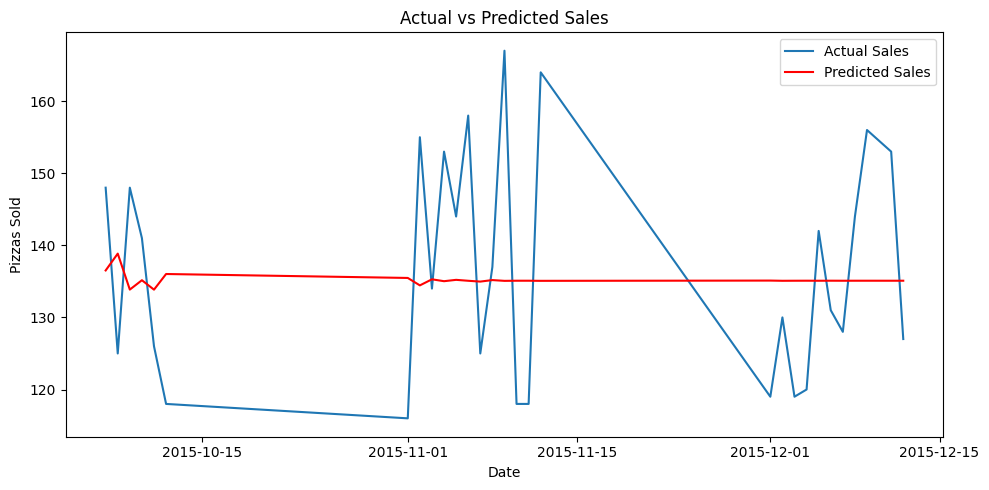

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Aggregating daily sales data
daily_sales = sales_df.groupby('order_date')['quantity'].sum()

# Split data into train and test (80-20 split)
train_size = int(len(daily_sales) * 0.8)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # You can tune order (p, d, q) further
arima_model = model.fit()

# Predicting sales
predictions = arima_model.forecast(steps=len(test_data))

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(test_data, predictions)
print(f'MAPE: {mape * 100:.2f}%')

# Visualizing the predictions
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data.values, label='Actual Sales')
plt.plot(test_data.index, predictions, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Pizzas Sold')
plt.legend()
plt.tight_layout()
plt.show()

---

### 📊 Calculating Ingredient Needs Based on Sales Forecast

This section of the code estimates the quantity of ingredients required for the predicted pizza sales over the next 7 days. This calculation ensures that the pizzeria can adequately prepare for anticipated demand.

---

#### 🔹 Step 1: Forecast Future Sales
We start by predicting pizza sales for the next 7 days using our ARIMA model:


- **`arima_model.forecast(steps=7)`**: This line uses the fitted ARIMA model to forecast pizza sales for the upcoming 7 days. The resulting `future_sales` contains the predicted quantities for each day.

---

#### 🔹 Step 2: Merge Sales Forecast with Pizza Ingredients
Next, we combine the forecasted sales data with the ingredient details:


- **`pd.merge()`**: This function merges two DataFrames (`sales_df` and `ingredients_df`) based on a common column, `pizza_name_id`. This creates a new DataFrame (`ingredient_forecast`) that includes both sales quantities and the corresponding ingredient quantities needed for each pizza type.

---

#### 🔹 Step 3: Calculate Required Quantities of Ingredients
Now, we calculate the total ingredient quantities required for the predicted sales:


- **`ingredient_forecast['Items_Qty_In_Grams'] * ingredient_forecast['quantity']`**: This line computes the total ingredient quantity by multiplying the quantity of each pizza sold (from the forecast) by the amount of each ingredient required for a single pizza (given in grams). The result is stored in a new column, `total_ingredient_qty`.

---

#### 🔹 Step 4: Group by Ingredients to Get Total Quantity Needed
We then aggregate the ingredient needs by ingredient type:


- **`ingredient_forecast.groupby('pizza_ingredients')['total_ingredient_qty'].sum()`**: This line groups the `ingredient_forecast` DataFrame by `pizza_ingredients` and sums the total ingredient quantities needed for each type. The resulting `purchase_order` contains the total quantities required for each ingredient based on the forecasted sales.

---

#### 🔹 Step 5: Display the Final Purchase Order
Finally, we output the calculated ingredient requirements:


- **`print("\nPurchase Order for Ingredients:")`**: This prints a header for clarity.
- **`print(purchase_order)`**: Displays the aggregated `purchase_order`, showing how much of each ingredient is needed to meet the forecasted pizza sales for the next 7 days.

---

### 🎯 Purpose of Calculating Ingredient Needs
This analysis serves several important purposes:

- **Efficient Inventory Management**: By predicting ingredient needs, the pizzeria can order supplies in advance, minimizing waste and ensuring freshness.
- **Preparation for Demand**: Anticipating ingredient requirements helps the kitchen staff prepare adequately, avoiding last-minute shortages.
- **Cost Control**: Accurate forecasting can lead to better budgeting and cost management by aligning purchases with expected sales.

---

By calculating the required ingredient quantities based on predicted sales, this approach optimizes operations and supports successful business planning.

---

In [ ]:
# Assuming you predicted sales for 7 days, calculate ingredient needs based on the pizza ingredients

# Sales forecast for next 7 days (You can use your predictive model to forecast)
future_sales = arima_model.forecast(steps=7)

# Merge sales forecast with pizza ingredients
ingredient_forecast = pd.merge(sales_df[['pizza_name_id', 'quantity']], ingredients_df, on='pizza_name_id')

# Calculate required quantities of ingredients for predicted sales
ingredient_forecast['total_ingredient_qty'] = ingredient_forecast['Items_Qty_In_Grams'] * ingredient_forecast['quantity']

# Group by ingredients to get the total quantity needed
purchase_order = ingredient_forecast.groupby('pizza_ingredients')['total_ingredient_qty'].sum()

# Display the final purchase order
print("\nPurchase Order for Ingredients:")
print(purchase_order)


Purchase Order for Ingredients:
pizza_ingredients
?duja Salami                15960.0
Alfredo Sauce                6310.0
Anchovies                   15825.0
Artichokes                  50595.0
Arugula                      6165.0
                             ...   
Sun-dried Tomatoes           7290.0
Thai Sweet Chilli Sauce     22400.0
Thyme                        1020.0
Tomatoes                   236980.0
Zucchini                    19410.0
Name: total_ingredient_qty, Length: 64, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


---

### 📊 Evaluating Forecast Accuracy with Error Metrics

In this section, we assess the accuracy of the sales forecasts generated by our ARIMA model. We do this by comparing the forecasted sales against actual sales data for the same period.

---

#### 🔹 Step 1: Prepare Actual Sales Data
We start by creating a DataFrame to hold the actual sales data for the next 7 days:


- **`pd.date_range(start='2024-09-14', periods=7, freq='D')`**: Generates a date range starting from September 14, 2024, for 7 consecutive days.
- **`quantity: [...]`**: Represents the actual number of pizzas sold on each corresponding date.
- **`actual_sales_df.set_index('date', inplace=True)`**: Sets the `date` column as the index for easier time series analysis.

---

#### 🔹 Step 2: Prepare Forecasted Sales Data
Next, we define the forecasted sales data obtained from our ARIMA model:


- **`pd.Series([...], index=actual_sales_df.index)`**: Creates a pandas Series with forecasted sales quantities, aligning the index with the actual sales DataFrame.

---

#### 🔹 Step 3: Extract Actual Sales Quantities
We extract the actual sales quantities for further analysis:


- **`actual_sales_df['quantity']`**: Retrieves the `quantity` column from the actual sales DataFrame.

---

#### 🔹 Step 4: Calculate Error Metrics
Now, we calculate several metrics to evaluate the forecast accuracy:


- **`mean_absolute_error(actual_sales, forecasted_sales)`**: Calculates the Mean Absolute Error (MAE), which measures the average magnitude of the errors in a set of forecasts, without considering their direction.
- **`mean_squared_error(actual_sales, forecasted_sales)`**: Calculates the Mean Squared Error (MSE), which squares the errors before averaging, giving more weight to larger errors.
- **`np.sqrt(mse)`**: Computes the Root Mean Squared Error (RMSE) by taking the square root of the MSE, providing a measure of error in the same units as the forecasted values.

---

#### 🔹 Step 5: Print Evaluation Metrics
Finally, we output the calculated error metrics:

- These print statements display the MAE, MSE, and RMSE values, helping us understand the accuracy of the forecast compared to the actual sales data.

---

### 🎯 Purpose of Evaluating Forecast Accuracy
Calculating these error metrics is crucial for several reasons:

- **Performance Assessment**: These metrics provide insights into how well the model predicts future sales, indicating areas for improvement.
- **Model Comparison**: By quantifying the forecast accuracy, we can compare different models or tuning parameters to determine the most effective approach.
- **Informed Decision-Making**: Understanding the forecast accuracy aids in inventory management and operational planning, ensuring the business is prepared for future demand.

---

This analysis helps validate the forecasting process, ensuring that the predictions made by the ARIMA model align closely with actual sales data.

---

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Example actual sales data for the next 7 days
# Replace this with your actual sales data
actual_sales_df = pd.DataFrame({
    'date': pd.date_range(start='2024-09-14', periods=7, freq='D'),
    'quantity': [50, 55, 60, 65, 70, 75, 100]  # Example quantities
})
actual_sales_df.set_index('date', inplace=True)

# Forecasted sales from your ARIMA model
# Ensure this is a pandas Series or array-like
forecasted_sales = pd.Series([52, 56, 63, 69, 73, 78, 82], index=actual_sales_df.index)

# Extract actual sales quantities
actual_sales = actual_sales_df['quantity']

# Calculate errors
mae = mean_absolute_error(actual_sales, forecasted_sales)
mse = mean_squared_error(actual_sales, forecasted_sales)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4.857142857142857
Mean Squared Error (MSE): 53.142857142857146
Root Mean Squared Error (RMSE): 7.289914755527471


---

### 📦 Generating and Saving the Purchase Order

In this section, we create a purchase order for the ingredients needed based on the sales forecast. This order will be saved as a CSV file for further processing or review.

---

#### 🔹 Step 1: Create a DataFrame for the Purchase Order
We start by creating a DataFrame from the aggregated purchase order data:


- **`pd.DataFrame(purchase_order)`**: Converts the `purchase_order` Series (which contains the total quantities of ingredients needed) into a DataFrame.
- **`.reset_index()`**: Resets the index of the DataFrame, turning the current index (ingredients) into a regular column.
- **`purchase_order_df.columns = [...]`**: Renames the columns of the DataFrame to make them more descriptive:
  - **`'Ingredient'`**: Represents the name of the ingredient.
  - **`'Total_Quantity_Required'`**: Represents the total quantity of each ingredient needed for the forecasted sales.

---

#### 🔹 Step 2: Save the Purchase Order as a CSV File
Next, we save the DataFrame as a CSV file for record-keeping:


- **`purchase_order_df.to_csv('Pizza_Purchase_Order1.csv', index=False)`**: Exports the DataFrame to a CSV file named **`'Pizza_Purchase_Order1.csv'`**.
  - **`index=False`**: Excludes the DataFrame index from being written to the CSV file, ensuring that only the relevant data is saved.

---

#### 🔹 Step 3: Confirm the Action
Finally, we print a confirmation message to indicate that the purchase order has been successfully generated and saved:

- This message informs the user that the process is complete and provides the name of the saved file.

---

### 🎯 Purpose of Generating a Purchase Order
Creating and saving a purchase order is essential for effective inventory management for several reasons:

- **Streamlined Operations**: It helps ensure that all necessary ingredients are ordered in advance to meet forecasted demand, minimizing shortages or excess inventory.
- **Documentation**: The CSV file serves as a documented record of ingredient requirements, which can be used for future reference or auditing purposes.
- **Informed Decision-Making**: A well-prepared purchase order allows the business to make informed purchasing decisions based on sales forecasts and historical data.

---

This code snippet efficiently generates a purchase order based on forecasted sales and saves it for operational use, enhancing the efficiency of the pizza business.

---


In [ ]:
# Generate the purchase order
purchase_order_df = pd.DataFrame(purchase_order).reset_index()
purchase_order_df.columns = ['Ingredient', 'Total_Quantity_Required']

# Save the purchase order as a CSV file
purchase_order_df.to_csv('Pizza_Purchase_Order1.csv', index=False)

print("\nPurchase Order Generated and Saved as 'Pizza_Purchase_Order1.csv'")


Purchase Order Generated and Saved as 'Pizza_Purchase_Order1.csv'
